# Анализ пространственных данных. Домашнее задание №1

Данные для выполнения заданий можно найти [здесь](https://yadi.sk/d/xBemeb0ODlhCAQ?w=1)

Дедлайн: __20 октября 2020 г. 09:00__

ФИО: `Педченко Андрей Николаевич`

Группа: `MADE-ML-32`

## Задание №1. Reading coordinates from a file and creating a geometries. 4 балла.

One of the "classical" problems in GIS is the situation where you have a set of coordinates in a file and you need to get them into a map (or into a GIS-software). Dataset `travelTimes_2015_Helsinki.txt` consist of travel times between specific locations in Helsinki Region.

1. Read the data into memory.
2. Read 4 columns `from_x`, `from_y`, `to_x`, `to_y` from the data.
3. Create two lists called __orig_points__ and __dest_points__
4. Iterate over the rows of your numpy array and add Shapely Point -objects into the __orig_points__ -list and __dest_point__ -list representing the origin locations and destination locations accordingly.

`from_x`: x-coordinate of the __origin__ location (longitude)

`from_y`: y-coordinate of the __origin__ location (latitude)

`to_x`: x-coordinate of the __destination__ location (longitude)

`to_y`: y-coordinate of the __destination__ location (latitude)

In [ ]:
!pip install geopandas

In [ ]:
!pip install mapclassify

# pysal не удалось установить в колаб, поэтому использую этот модуль

In [ ]:
# put your code here

# 1. Read the data into memory.

import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString
import mapclassify as mc
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

df_helsinki = pd.read_csv("travelTimes_2015_Helsinki.txt", sep=";")
df_helsinki.head(3)

,from_id,to_id,fromid_toid,route_number,at,from_x,from_y,to_x,to_y,total_route_time,route_time,route_distance,route_total_lines
0,5861326,5785640,5861326_5785640,1,08:10,24.970438,60.311917,24.856034,60.399941,125.0,99.0,22917.6,2.0
1,5861326,5785641,5861326_5785641,1,08:10,24.970438,60.311917,24.860568,60.400014,123.0,102.0,23123.5,2.0
2,5861326,5785642,5861326_5785642,1,08:10,24.970438,60.311917,24.865102,60.400086,125.0,103.0,23241.3,2.0


In [ ]:
# 2. Read 4 columns from_x, from_y, to_x, to_y from the data.
# 3. Create two lists called orig_points and dest_points
# 4. Iterate over the rows of your numpy array and add Shapely Point -objects into
# the orig_points -list and dest_point -list representing the origin locations and
# destination locations accordingly.

orig_points = []
dest_points = []

for row in df_helsinki[['from_x', 'from_y', 'to_x', 'to_y']].values:
  orig_points.append(Point(row[0], row[1]))
  dest_points.append(Point(row[2], row[3]))

## Задание №2. Creating LineStrings that represent the movements. 6 баллов.

Please use data from previous task:

1. Create a list called `lines`
2. Iterate over the __orig_points__ and __dest_points__ lists and create a Shapely _LineString_ -object between the origin and destination point
3. Add that line into the `lines` -list.
4. Find out what is the average (Euclidian) distance of all the origin-destination _LineStrings_ that we just created, and print it out.

In [ ]:
# put your code here

lines = []
lines_distances = []

for i in range(len(df_helsinki)):
  line = LineString([orig_points[i], dest_points[i]])
  lines.append(line)
  lines_distances.append(line.length)

avg_distance = np.array(lines_distances).mean()

print("Average (Euclidian) distance of all the origin-destination LineStrings:",avg_distance)

Average (Euclidian) distance of all the origin-destination LineStrings: 0.2150222482322721


## Задание №3. Points to map. 4 балла.

Aim is to plot a set of x and y coordinates that we should read from a `some_posts.csv`. The data has 81379 rows and consists of locations and times of social media posts inside Kruger national park in South Africa.

1. Read the data into memory.
2. Create an empty column called `geometry` where you will store shapely _Point_ objects
3. Iterate over the rows of the DataFrame (__x__ and __y__ -coordinates) and insert _Point_ objects into column `geometry`
4. Convert that DataFrame into a GeoDataFrame
5. Update the CRS for coordinate system as WGS84 (i.e. epsg code: 4326)
6. Save the data into a Shapefile called `Kruger_posts.shp`
7. Create a simple map of those points using .plot() -funtion

`lat`: y-coordinate of the post

`lon`: x-coordinate of the post

`timestamp`: Time when the post was uploaded

`userid`: userid

In [ ]:
# put your code here

# 1. Read the data into memory.

df_posts = pd.read_csv('some_posts.txt', sep=',')
df_posts.head(3)

,lat,lon,timestamp,userid
0,-24.980792,31.484633,2015-07-07 03:02,66487960
1,-25.499225,31.508906,2015-07-07 03:18,65281761
2,-24.342578,30.930866,2015-03-07 03:38,90916112


In [ ]:
# 2. Create an empty column called geometry where you will store shapely Point objects
# 3. Iterate over the rows of the DataFrame (x and y -coordinates) and insert Point objects into column geometry

df_posts['geometry'] = ''

for index, row in df_posts.iterrows():
  df_posts.loc[index, 'geometry'] = Point(row[0], row[1])

In [ ]:
df_posts.head(3)

,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (-24.980792492 31.484633302)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (-25.499224667 31.508905612)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (-24.342578456 30.930866066)


In [ ]:
# 4. Convert that DataFrame into a GeoDataFrame
# 5. Update the CRS for coordinate system as WGS84 (i.e. epsg code: 4326)
# 6. Save the data into a Shapefile called Kruger_posts.shp

df_posts = gpd.GeoDataFrame(df_posts, geometry='geometry', crs={'init': 'epsg:4326'})
df_posts.to_file('Kruger_posts.shp')

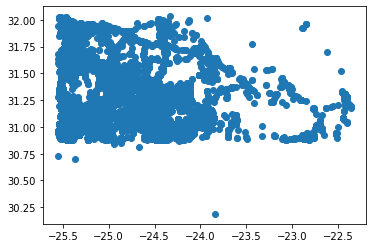

In [ ]:
# 7. Create a simple map of those points using .plot() -funtion

df_posts['geometry'].plot()

## Задание №4. Movements of individual user. 6 баллов.

Please use data from previous task:

1. Group the data by `userid`
2. Create an empty GeoDataFrame
3. For each user:
   - sort the rows by `timestamp`
   - create _LineString_ objects based on the points
   - add the `geometry` and the `userid` into the GeoDataFrame you created in the last step
4. Determine the CRS of your GeoDataFrame to WGS84 (epsg code: 4326)
5. Save the movements of each user into a separate Shapefile
   - Name the output Shapefile based on the `userid` number

In [ ]:
# put your code here

# 1. Group the data by userid
# 2. Create an empty GeoDataFrame
# 3. For each user:
#   sort the rows by timestamp
#   create LineString objects based on the points
#   add the geometry and the userid into the GeoDataFrame you created in the last step
# 4. Determine the CRS of your GeoDataFrame to WGS84 (epsg code: 4326)

df_posts_group = df_posts.groupby("userid")
gdf_from_step_two = gpd.GeoDataFrame(data={'geometry':[], 'userid':[]}, crs={'init': 'epsg:4326'})

index = 0

for userid, group in df_posts_group:
  if len(group) >= 2:
    group.sort_values(by=['timestamp'])
    line = LineString(list(group['geometry']))
    gdf_from_step_two.loc[index] = [line, userid]
    index += 1

In [ ]:
gdf_from_step_two.head(3)

,geometry,userid
0,"LINESTRING (-24.76017 31.33943, -24.75951 31.3...",16301.0
1,"LINESTRING (-25.32131 31.02582, -25.32131 31.0...",45136.0
2,"LINESTRING (-24.99253 31.59261, -24.76985 31.3...",50136.0


In [ ]:
# 5. Save the movements of each user into a separate Shapefile

for index, row in gdf_from_step_two.iterrows():
  userid = str(row['userid'])
  geometry = row['geometry']
  gpd.GeoDataFrame(data={'geometry':[geometry], 'userid':[int(userid[:-2])]}, crs={'init': 'epsg:4326'}).to_file(userid[:-2]+'.shp')
  
  # Больше 40 тысяч файлов делать не хотелось, поэтому поставил ограничение
  if index == 10:
    break

## Задание №5. Join accessibility datasets into a grid and visualize them by using a classifier. 4 балла.

A dataset from `dataE4.zip` includes 7 text files containing data about accessibility in Helsinki Region and a Shapefile that contains a Polygon grid that can be used to visualize and analyze the data spatially. The datasets are:

 - `travel_times_to_[XXXXXXX]_[NAME-OF-THE-CENTER].txt` including travel times and road network distances to specific shopping center
 - `MetropAccess_YKR_grid_EurefFIN.shp` including the Polygon grid with __YKR_ID__ column that can be used to join the grid with the accessibility data
 
Find out more about the data [here](https://blogs.helsinki.fi/accessibility/helsinki-region-travel-time-matrix-2015/)

1. Read those travel_time data files (one by one) with Pandas and select only following columns from them:

 - `pt_r_tt`
 - `car_r_t`
 - `from_id`
 - `to_id`


2. Visualize the classified travel times (Public transport AND Car) of at least one of the shopping centers using any classification method (see [PySAL](https://pysal.org/) for more details upon classification methods). You need to classify the data into a new column in your GeoDataFrame.

In [ ]:
# put your code here

# Сначала построим для одного ТЦ Jumbo

# 1. Read those travel_time data files (one by one) with Pandas and select only following columns from them:

df_jumbo = pd.read_csv('TravelTimes_to_5878070_Jumbo.txt', sep=';', usecols=['pt_r_t', 'car_r_t', 'from_id', 'to_id'])
df_jumbo.head(3)

,from_id,to_id,car_r_t,pt_r_t
0,5785640,5878070,39,101
1,5785641,5878070,39,108
2,5785642,5878070,45,109


In [ ]:
gdf_ykr_grid = gpd.read_file('MetropAccess_YKR_grid_EurefFIN.shp')
gdf_ykr_grid.head(3)

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."


In [ ]:
gdf_merge = gdf_ykr_grid.merge(df_jumbo, left_on='YKR_ID', right_on = 'from_id')
gdf_merge.head(3)

,x,y,YKR_ID,geometry,from_id,to_id,car_r_t,pt_r_t
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",5785640,5878070,39,101
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",5785641,5878070,39,108
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",5785642,5878070,45,109


In [ ]:
cal = gdf_merge["pt_r_t"]
bins = [num for num in range(1, max(cal)) if num % 15 == 0]
ud = mc.UserDefined(cal, bins)
gdf_merge['pt_r_t_classified_travel_time'] = gdf_merge[['pt_r_t']].apply(ud)
gdf_merge['car_r_t_classified_travel_time'] = gdf_merge[['car_r_t']].apply(ud)
gdf_merge.head(3)

,x,y,YKR_ID,geometry,from_id,to_id,car_r_t,pt_r_t,pt_r_t_classified_travel_time,car_r_t_classified_travel_time
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",5785640,5878070,39,101,6,2
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",5785641,5878070,39,108,7,2
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",5785642,5878070,45,109,7,2


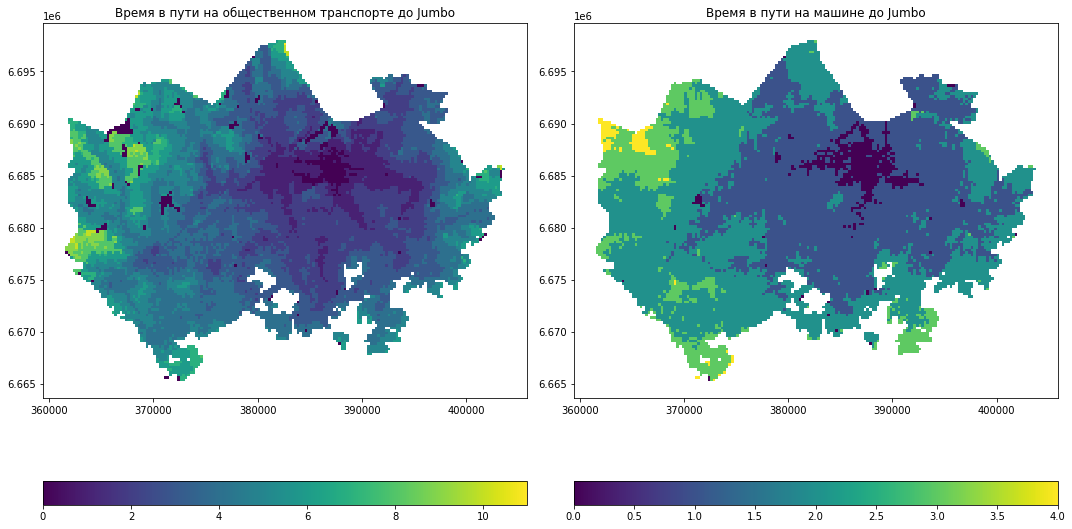

In [ ]:
# 2. Visualize the classified travel times (Public transport AND Car) of at least one of the shopping centers using any classification method

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
gdf_merge.plot(ax=ax1, column='pt_r_t_classified_travel_time', legend=True, legend_kwds={'orientation': "horizontal"})
ax1.set_title('Время в пути на общественном транспорте до Jumbo')
gdf_merge.plot(ax=ax2, column='car_r_t_classified_travel_time', legend=True, legend_kwds={'orientation': "horizontal"})
ax2.set_title('Время в пути на машине до Jumbo')
plt.tight_layout()

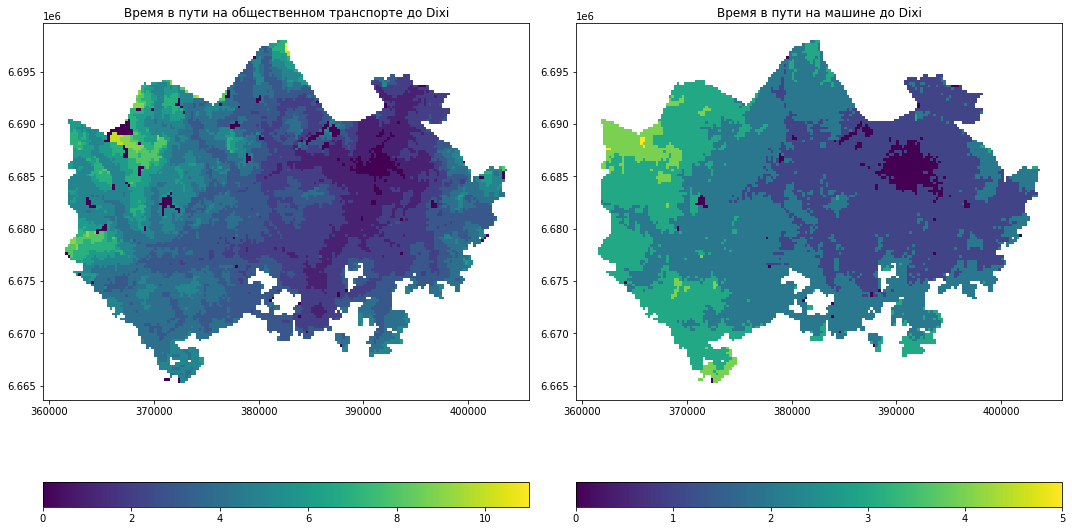

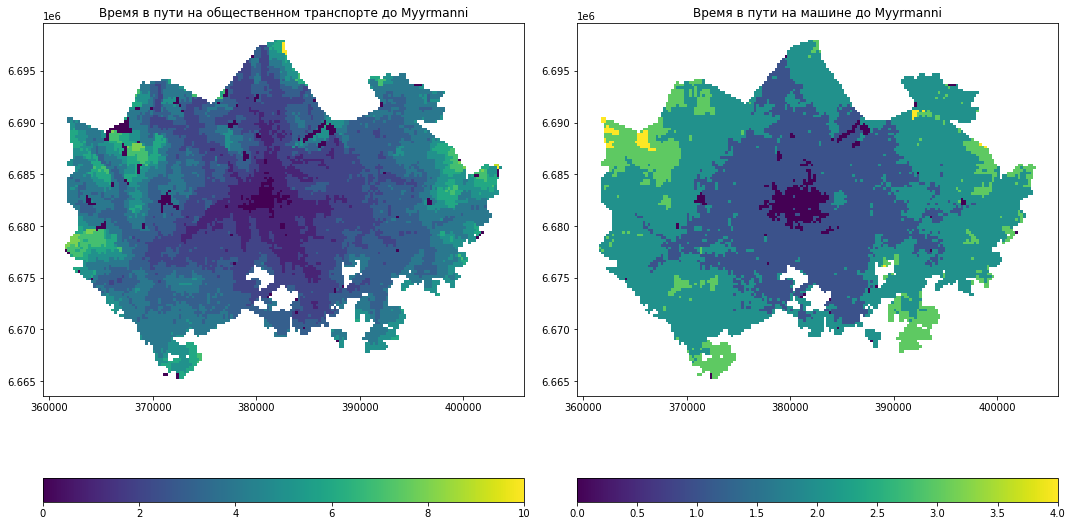

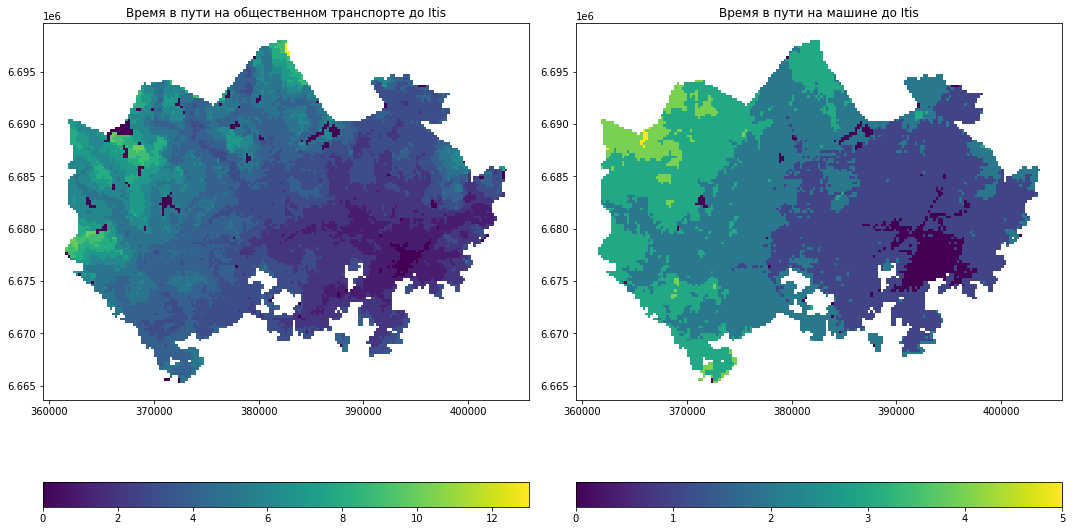

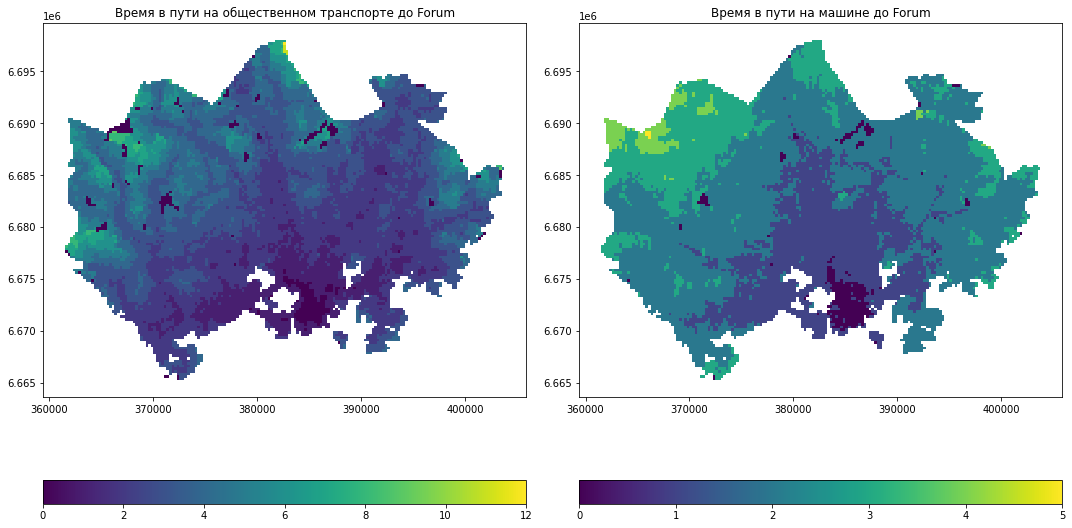

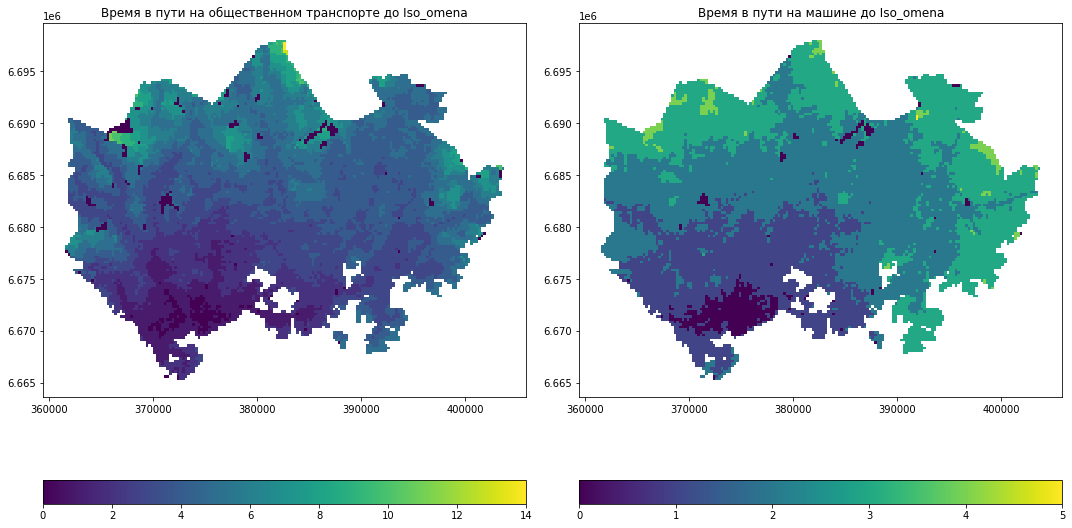

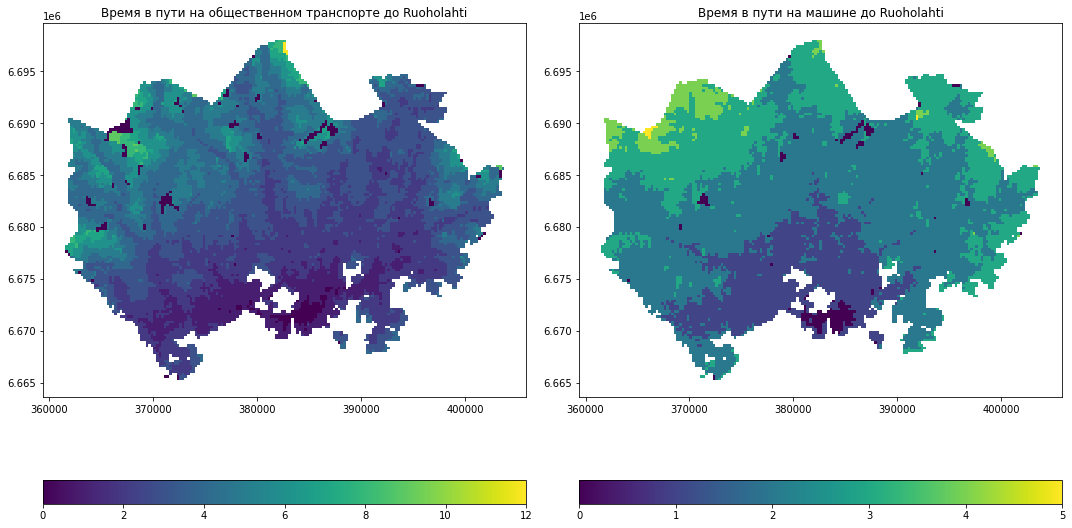

In [ ]:
# Теперь строим для остальных ТЦ

molls = [
         'TravelTimes_to_5878087_Dixi.txt', 'TravelTimes_to_5902043_Myyrmanni.txt',
         'TravelTimes_to_5944003_Itis.txt', 'TravelTimes_to_5975373_Forum.txt',
         'TravelTimes_to_5978593_Iso_omena.txt', 'TravelTimes_to_5980260_Ruoholahti.txt'
         ]

for i in range(6):
  df_moll = pd.read_csv(molls[i], sep=';', usecols=['pt_r_t', 'car_r_t', 'from_id', 'to_id'])
  gdf_merge = gdf_ykr_grid.merge(df_moll, left_on='YKR_ID', right_on = 'from_id')
  cal = gdf_merge["pt_r_t"]
  bins = [num for num in range(1, max(cal)) if num % 15 == 0]
  ud = mc.UserDefined(cal, bins)
  gdf_merge['pt_r_t_classified_travel_time'] = gdf_merge[['pt_r_t']].apply(ud)
  gdf_merge['car_r_t_classified_travel_time'] = gdf_merge[['car_r_t']].apply(ud)

  moll_name = molls[i][23:-4]

  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
  gdf_merge.plot(ax=ax1, column='pt_r_t_classified_travel_time', legend=True, legend_kwds={'orientation': "horizontal"})
  ax1.set_title('Время в пути на общественном транспорте до ' + moll_name)
  gdf_merge.plot(ax=ax2, column='car_r_t_classified_travel_time', legend=True, legend_kwds={'orientation': "horizontal"})
  ax2.set_title('Время в пути на машине до ' + moll_name)
  plt.tight_layout()

## Задание №6. Calculate and visualize the dominance areas of shopping centers. 6 баллов.

Please use data from previous task. The aim is to define the dominance area for each of those shopping centers based on travel time:

1. Iterate over the accessibility files one by one
2. Rename the travel time columns so that they can be identified
   - you can include e.g. the `to_id` number as part of the column name (then the column name could be e.g. "pt_r_tt_5987221")
3. Join those columns into `MetropAccess_YKR_grid_EurefFIN.shp` where __YKR_ID__ in the grid corresponds to `from_id` in the travel time data file. At the end you should have a GeoDataFrame with different columns show the travel times to different shopping centers.
4. For each row find out the __minimum__ value of __all__ `pt_r_tt_XXXXXX` columns and insert that value into a new column called `min_time_pt`. You can now also parse the `to_id` value from the column name (i.e. parse the last number-series from the column text) that had the minimum travel time value and insert that value as a number into a column called `dominant_service`. In this, way are able to determine the "closest" shopping center for each grid cell and visualize it either by travel times or by using the __YKR_ID__ number of the shopping center (i.e. that number series that was used in column name).
5. Visualize the travel times of our `min_time_pt` column using any classifier.
6. Visualize also the values in `dominant_service` column (no need to use any specific classifier). Notice that the value should be a number. If it is still as text, you need to convert it first.

In [ ]:
# put your code here

# 1. Iterate over the accessibility files one by one
# 2. Rename the travel time columns so that they can be identified
#   you can include e.g. the to_id number as part of the column name
#   (then the column name could be e.g. "pt_r_tt_5987221")
# 3. Join those columns into MetropAccess_YKR_grid_EurefFIN.shp where YKR_ID in
# the grid corresponds to from_id in the travel time data file. At the end you
# should have a GeoDataFrame with different columns show the travel times to different
# shopping centers.

molls = [
         'TravelTimes_to_5878070_Jumbo.txt',
         'TravelTimes_to_5878087_Dixi.txt', 'TravelTimes_to_5902043_Myyrmanni.txt',
         'TravelTimes_to_5944003_Itis.txt', 'TravelTimes_to_5975373_Forum.txt',
         'TravelTimes_to_5978593_Iso_omena.txt', 'TravelTimes_to_5980260_Ruoholahti.txt'
         ]
ids = ['5878070', '5878087', '5902043', '5944003', '5975373', '5978593', '5980260']
gdf_ykr_grid = gpd.read_file('MetropAccess_YKR_grid_EurefFIN.shp')

for i in range(7):
  df_moll = pd.read_csv(molls[i], sep=';', usecols=['pt_r_t','car_r_t','from_id','to_id'])
  df_moll.rename(columns={"pt_r_t": "pt_r_t" + "_" + ids[i], "car_r_t": "car_r_t" + "_" + ids[i],
                          "from_id": "from_id" + "_" + ids[i], "to_id": "to_id" + "_" + ids[i]}, inplace=True)
  
  gdf_ykr_grid = gdf_ykr_grid.merge(df_moll, left_on="YKR_ID", right_on="from_id_" + ids[i], left_index=True, how="inner")

gdf_ykr_grid.head(3)

,x,y,YKR_ID,geometry,from_id_5878070,to_id_5878070,car_r_t_5878070,pt_r_t_5878070,from_id_5878087,to_id_5878087,car_r_t_5878087,pt_r_t_5878087,from_id_5902043,to_id_5902043,car_r_t_5902043,pt_r_t_5902043,from_id_5944003,to_id_5944003,car_r_t_5944003,pt_r_t_5944003,from_id_5975373,to_id_5975373,car_r_t_5975373,pt_r_t_5975373,from_id_5978593,to_id_5978593,car_r_t_5978593,pt_r_t_5978593,from_id_5980260,to_id_5980260,car_r_t_5980260,pt_r_t_5980260
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",5785640,5878070,39,101,5785640,5878087,45,102,5785640,5902043,39,90,5785640,5944003,50,132,5785640,5975373,49,110,5785640,5978593,56,141,5785640,5980260,56,118
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",5785641,5878070,39,108,5785641,5878087,45,109,5785641,5902043,39,93,5785641,5944003,51,135,5785641,5975373,49,113,5785641,5978593,56,143,5785641,5980260,56,121
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",5785642,5878070,45,109,5785642,5878087,52,111,5785642,5902043,47,95,5785642,5944003,58,137,5785642,5975373,57,115,5785642,5978593,64,145,5785642,5980260,63,123


In [ ]:
# 4. For each row find out the minimum value of all pt_r_tt_XXXXXX columns and insert
# that value into a new column called min_time_pt. You can now also parse the to_id value
# from the column name (i.e. parse the last number-series from the column text) that had the
# minimum travel time value and insert that value as a number into a column called dominant_service.
# In this, way are able to determine the "closest" shopping center for each grid cell and visualize it
# either by travel times or by using the YKR_ID number of the shopping center

pt_r_t_cols = [col for col in gdf_ykr_grid.columns if 'pt_r_t' in col]
gdf_ykr_grid['min_time_pt'] = gdf_ykr_grid.loc[:, pt_r_t_cols].min(axis=1)
gdf_ykr_grid['dominant_service'] = gdf_ykr_grid.loc[:, pt_r_t_cols].idxmin(axis=1).apply(lambda x: int(str(x)[7:]))
gdf_ykr_grid.head(3)

,x,y,YKR_ID,geometry,from_id_5878070,to_id_5878070,car_r_t_5878070,pt_r_t_5878070,from_id_5878087,to_id_5878087,car_r_t_5878087,pt_r_t_5878087,from_id_5902043,to_id_5902043,car_r_t_5902043,pt_r_t_5902043,from_id_5944003,to_id_5944003,car_r_t_5944003,pt_r_t_5944003,from_id_5975373,to_id_5975373,car_r_t_5975373,pt_r_t_5975373,from_id_5978593,to_id_5978593,car_r_t_5978593,pt_r_t_5978593,from_id_5980260,to_id_5980260,car_r_t_5980260,pt_r_t_5980260,min_time_pt,dominant_service,min_time_pt_classified_travel_time
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",5785640,5878070,39,101,5785640,5878087,45,102,5785640,5902043,39,90,5785640,5944003,50,132,5785640,5975373,49,110,5785640,5978593,56,141,5785640,5980260,56,118,90,5902043,5
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",5785641,5878070,39,108,5785641,5878087,45,109,5785641,5902043,39,93,5785641,5944003,51,135,5785641,5975373,49,113,5785641,5978593,56,143,5785641,5980260,56,121,93,5902043,6
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",5785642,5878070,45,109,5785642,5878087,52,111,5785642,5902043,47,95,5785642,5944003,58,137,5785642,5975373,57,115,5785642,5978593,64,145,5785642,5980260,63,123,95,5902043,6


In [ ]:
cal = gdf_ykr_grid["min_time_pt"]
bins = [num for num in range(1, max(cal)) if num % 15 == 0]
ud = mc.UserDefined(cal, bins)
gdf_ykr_grid['min_time_pt_classified_travel_time'] = gdf_ykr_grid[['min_time_pt']].apply(ud)

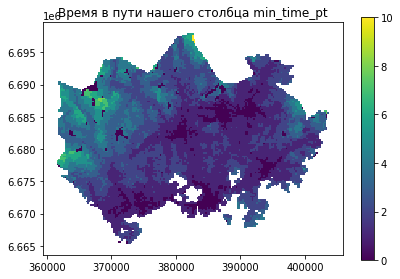

In [ ]:
# 5. Visualize the travel times of our min_time_pt column using any classifier.

gdf_ykr_grid.plot(column='min_time_pt_classified_travel_time', legend=True)
plt.title('Время в пути нашего столбца min_time_pt')
plt.tight_layout()

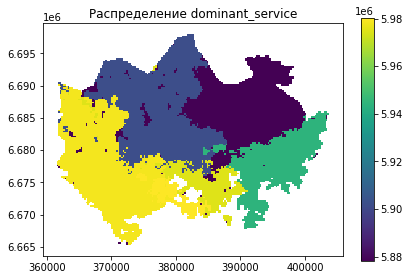

In [ ]:
# 6. Visualize also the values in dominant_service column (no need to use any specific
# classifier). Notice that the value should be a number. If it is still as text, you need to convert it first.

gdf_ykr_grid.plot(column='dominant_service', legend=True)
plt.title('Распределение dominant_service')
plt.tight_layout()